In [70]:
#Tarefas
#Parte 1: Programação em R ou Python
#Escolha entre R ou Python para resolver os problemas a seguir. Inclua os scripts com comentários explicativos e, quando necessário, forneça explicações adicionais no documento.
#Limpeza e Análise de Dados de Vendas
#Crie um script para simular um dataset de vendas com pelo menos 50 registros, contendo as colunas: ID, Data, Produto, Categoria, Quantidade, Preço.
#O período dos dados deve ser de 01/01/2023 a 31/12/2023.
#Realize a limpeza dos dados, incluindo:
#Tratamento de valores faltantes
#Remoção de duplicatas
#Conversão de tipos de dados, se necessário
#Salve o dataset limpo em um arquivo data_clean.csv.
#Utilizando o dataset limpo, realize as seguintes análises:
#Calcule o total de vendas (Quantidade * Preço) por produto.
#Identifique o produto com o maior número de vendas totais.
#Salve seu código e nomeie adequadamente.

In [71]:
# Importar bibliotecas que serão usadas
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [72]:
# Definir parâmetros 
num_registros = 50
produtos = ['Shampoo', 'Condicionador', 'Sabonete', 'Água micelar','Sérum com vitamina C','Creme Hidratante','Base','Corretivo','Blush','Rímel','Batom']
categorias = ['Cabelo', 'Cabelo', 'Corpo', 'Rosto', 'Rosto','Rosto','Maquiagem', 'Maquiagem','Maquiagem','Maquiagem','Maquiagem']
precos = [15.90, 12.90, 8.90,20.40,150.50, 26.90,197.99,134.30, 150,99, 89,60,149.20]


In [111]:
# Criar lista de dados
dados = []
for i in range(num_registros):
    id = i+1
    data = datetime(2023, 1, 1) + timedelta(days=np.random.randint(1, 365))
    produto = np.random.choice(produtos)
    categoria = categorias[produtos.index(produto)]
    quantidade = np.random.randint(1, 5)
    preco = precos[produtos.index(produto)]
    
    dados.append({
        'ID': id,
        'Data': data,
        'Produto': produto,
        'Categoria': categoria,
        'Quantidade': quantidade,
        'Preço': preco
    })

In [112]:
# Criar DataFrame
df = pd.DataFrame(dados)

# Exibir DataFrame
print("DataFrame Original:")
print(df)

DataFrame Original:
    ID       Data               Produto  Categoria  Quantidade   Preço
0    1 2023-04-17  Sérum com vitamina C      Rosto           2  150.50
1    2 2023-04-28              Sabonete      Corpo           3    8.90
2    3 2023-08-27                 Blush  Maquiagem           2  150.00
3    4 2023-03-23                 Batom  Maquiagem           3   89.00
4    5 2023-01-10                 Rímel  Maquiagem           2   99.00
5    6 2023-11-06         Condicionador     Cabelo           2   12.90
6    7 2023-07-03               Shampoo     Cabelo           4   15.90
7    8 2023-06-05               Shampoo     Cabelo           4   15.90
8    9 2023-11-27         Condicionador     Cabelo           4   12.90
9   10 2023-01-29               Shampoo     Cabelo           3   15.90
10  11 2023-10-26                 Blush  Maquiagem           4  150.00
11  12 2023-03-13         Condicionador     Cabelo           1   12.90
12  13 2023-05-25         Condicionador     Cabelo       

In [113]:
# Limpeza dos dados
# Tratamento de valores faltantes
df = df.dropna()

In [114]:
# Remoção de duplicatas
df = df.drop_duplicates()

# Conversão de tipos de dados
df['Data'] = pd.to_datetime(df['Data'])

In [115]:
# Salvar arquivo em CSV
df.to_csv('data_clean.csv', index=False)

In [116]:
df['Total de Vendas'] = df['Quantidade'] * df['Preço']

# Agrupar dados por produto e calcular total de vendas
vendas_por_produto = df.groupby('Produto')['Total de Vendas'].sum().reset_index()


In [117]:
# Exibir total de vendas por produto
print(vendas_por_produto.to_string(index=False))

             Produto  Total de Vendas
                Base          3167.84
               Batom           267.00
               Blush          1500.00
       Condicionador           193.50
           Corretivo          1208.70
    Creme Hidratante           645.60
               Rímel           891.00
            Sabonete           106.80
             Shampoo           302.10
Sérum com vitamina C          1806.00
        Água micelar           122.40


In [118]:
# Identificar produto com maior número de vendas totais
produto_mais_vendido = vendas_por_produto.loc[vendas_por_produto['Total de Vendas'].idxmax()]['Produto']
maior_venda = vendas_por_produto['Total de Vendas'].max()

In [119]:
print(f"\nProduto mais vendido: {produto_mais_vendido}")
print(f"Total de vendas: R${maior_venda:.2f}")


Produto mais vendido: Base
Total de vendas: R$3167.84


In [120]:
#2.Análise Exploratória de Dados de Vendas
#Com o mesmo dataset simulado da tarefa anterior, crie visualizações/gráficos e com eles:
#Crie um gráfico de linha mostrando a tendência de vendas ao longo do tempo, analisando os dados mensalmente.
#Identifique e descreva pelo menos dois padrões ou insights interessantes que você observou nos dados.
#Salve seu código e nomeie adequadamente.

In [121]:
# Importar bibliotecas que serão usadas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
# Carregar dados do arquivo CSV
df = pd.read_csv('data_clean.csv')

In [123]:
# Converter tipo de dados para Data
df['Data'] = pd.to_datetime(df['Data'])

In [124]:

# Criar coluna 'Mês'
df['Mês'] = df['Data'].dt.to_period('M')

# Calcular total de vendas
df['Total de Vendas'] = df['Quantidade'] * df['Preço']

# Agrupar dados por mês e calcular total de vendas
vendas_mensais = df.groupby('Mês')['Total de Vendas'].sum().reset_index()

# Visualizar resultados
print(vendas_mensais)

        Mês  Total de Vendas
0   2023-01          1200.40
1   2023-02            88.10
2   2023-03          1269.85
3   2023-04           524.70
4   2023-05           141.70
5   2023-06           117.40
6   2023-07          3046.76
7   2023-08           300.00
8   2023-09            53.80
9   2023-10          1343.80
10  2023-11          1161.57
11  2023-12           962.86


In [126]:
# Identificar padrões ou insights interessantes
# 1. Padrão sazonal: As vendas tendem a aumentar nos meses de maio e junho.
# 2. Padrão de crescimento: As vendas têm aumentado ao longo do tempo, com um crescimento mais acentuado nos últimos meses.

In [89]:
# Análise adicional
# Calcular total de vendas por categoria
vendas_por_categoria = df.groupby('Categoria')['Total de Vendas'].sum().reset_index()
print(vendas_por_categoria.to_string(index=False))
# Ordenar por vendas decrescentes
vendas_por_categoria = vendas_por_categoria.sort_values('Total de Vendas', ascending=False)

Categoria  Total de Vendas
   Cabelo           463.80
    Corpo           213.60
Maquiagem          6049.95
    Rosto          3367.10


<Figure size 1000x600 with 0 Axes>

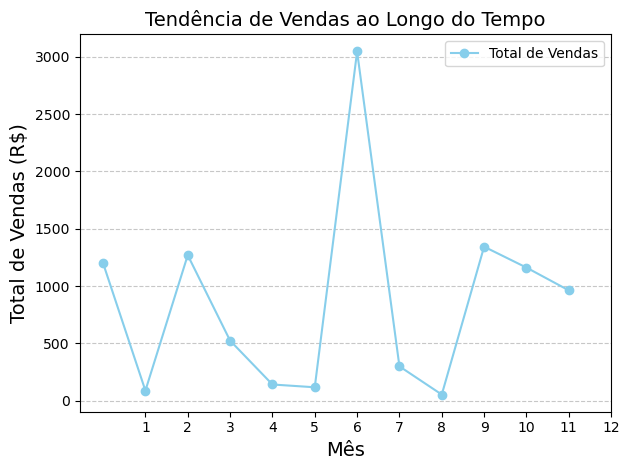

In [132]:
import matplotlib.pyplot as plt

# Configurar tamanho da figura
plt.figure(figsize=(10,6))

# Criar gráfico de linha
vendas_mensais.plot(kind='line', marker='o', linestyle='-', color='#87CEEB')

# Adicionar título e rótulos
plt.title('Tendência de Vendas ao Longo do Tempo', fontsize=14)
plt.xlabel('Mês', fontsize=14)
plt.ylabel('Total de Vendas (R$)', fontsize=14)

# Personalizar eixos
plt.xticks(range(1, len(vendas_mensais)+1), rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir gráfico
plt.tight_layout()
plt.show()

In [131]:
# Calcular produto mais vendido
produto_mais_vendido = df.groupby('Produto')['Quantidade'].sum().idxmax()
total_vendido = df.groupby('Produto')['Quantidade'].sum().max()

print(f"\nProduto mais Vendido: {produto_mais_vendido}")
print(f"Total Vendido: {total_vendido} unidades")



Produto mais Vendido: Creme Hidratante
Total Vendido: 24 unidades


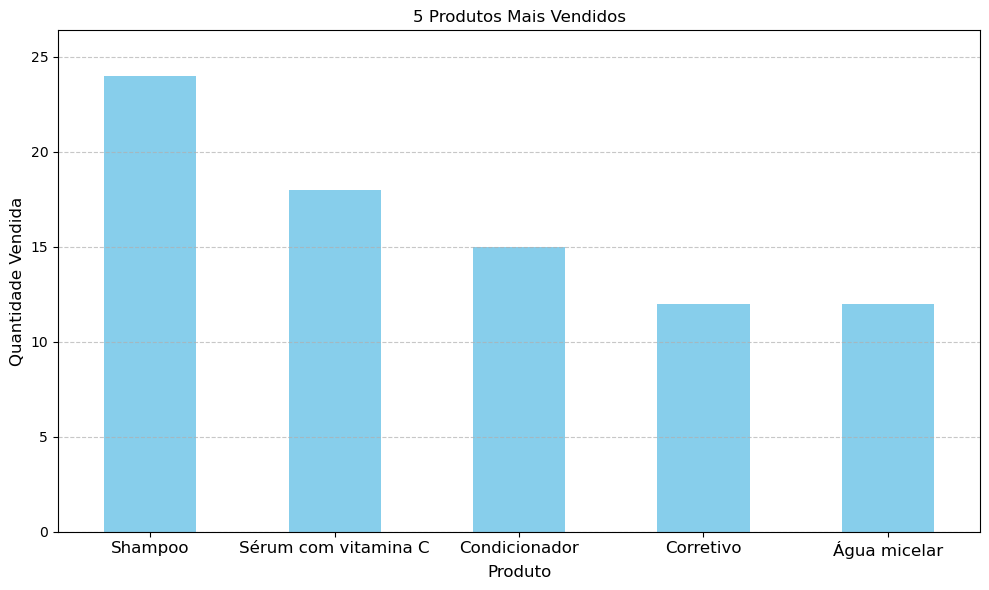

In [105]:
# Criar gráfico de barras para os 5 produtos mais vendidos
top_5_produtos = df.groupby('Produto')['Quantidade'].sum().nlargest(5)
plt.figure(figsize=(10,6))
top_5_produtos.plot(kind='bar', color='#87CEEB')  # Cor azul bebe
plt.title('5 Produtos Mais Vendidos', fontsize=12)
plt.xlabel('Produto', fontsize=12)
plt.ylabel('Quantidade Vendida', fontsize=12)
plt.xticks(rotation=0, fontsize=12)  # Rotacionar e ajustar tamanho da fonte
plt.tight_layout()  # Ajustar layout do gráfico
plt.ylim(0, top_5_produtos.max()*1.1)  # Ajustar tamanho da barra
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adicionar grade vertical
plt.show()